In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


# Load the Netflix dataset
netflix_data = pd.read_csv('C:/Users/ravip/Desktop/SEM2/Applied ML/project/Project_3_data.csv')
df= netflix_data

# Display the first few rows of the dataset to understand its structure
print(netflix_data.head())


  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

In [4]:
netflix_data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [3]:
# Remove NAs, nans, and nulls from the data
netflix_data = netflix_data.dropna()

# Task 1: Top 10 rated movies (R, TV-14, etc.) in a bar chart
Rating_counts = netflix_data['rating'].value_counts().head(10)
print(Rating_counts)



TV-MA    1665
TV-14    1133
R         654
TV-PG     413
PG-13     375
PG        238
TV-G       80
TV-Y       71
TV-Y7      69
NR         62
Name: rating, dtype: int64


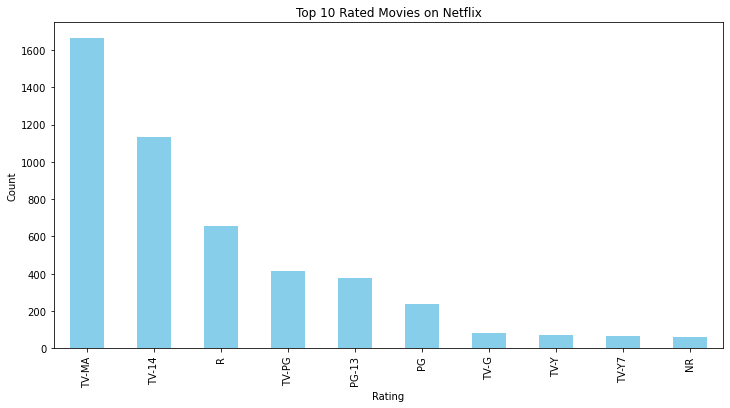

In [4]:
# Extract relevant columns for this task
top_rated_movies = netflix_data[['rating']]

# Count the occurrences of each rating
rating_counts = top_rated_movies['rating'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Rated Movies on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\ravip\AppData\Local\Temp\ipykernel_22488\2038063943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data['decade'] = (netflix_data['release_year'] // 10) * 10


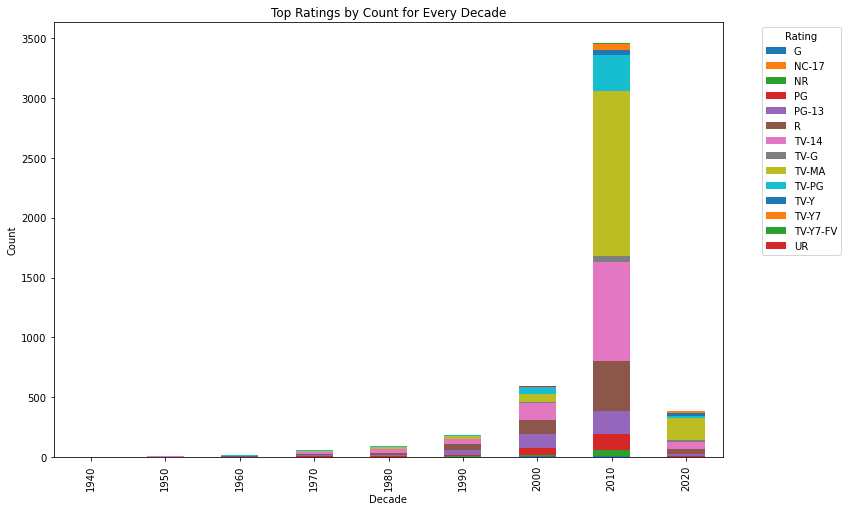

In [5]:
# Convert 'release_year' to a decade
netflix_data['decade'] = (netflix_data['release_year'] // 10) * 10

# Create a stacked bar chart for top ratings by count for every decade
decade_ratings = netflix_data.groupby(['decade', 'rating']).size().unstack().fillna(0)

# Plot the results
ax = decade_ratings.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top Ratings by Count for Every Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [6]:
# Task 1: Understanding what content is available in different countries
country_distribution = netflix_data['country'].value_counts().head(10)
print(country_distribution)


United States     1653
India              832
United Kingdom     174
Canada             104
Egypt               87
Spain               83
Turkey              76
Japan               76
Philippines         70
Indonesia           67
Name: country, dtype: int64


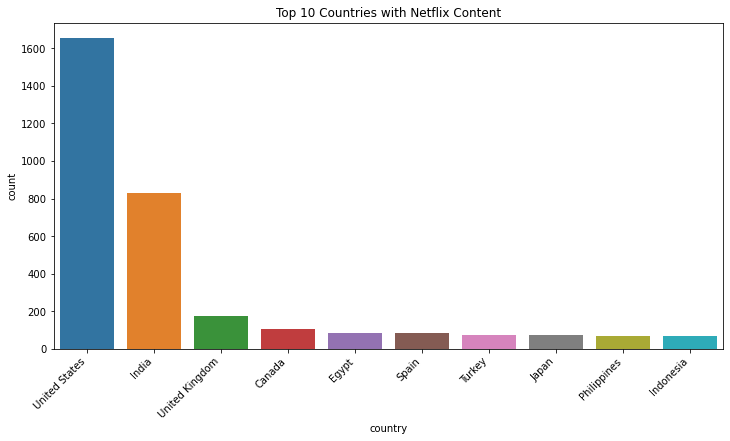

In [7]:

# Visualize the distribution of content by country
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=netflix_data, order=netflix_data['country'].value_counts().index[:10])
plt.title('Top 10 Countries with Netflix Content')
plt.xticks(rotation=45, ha='right')
plt.show()


In [9]:
# Task 2: Identifying similar content by matching text-based features
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Combine relevant text-based features
df['text_features'] = df['title'] + ' ' + df['description']

# Create a TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_features'].fillna(''))

# Compute the cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on similarity
def get_recommendations(title):
    idx = df.index[df['title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

# Example: Get recommendations for a specific title
title_to_recommend = '3%'
recommendations = get_recommendations(title_to_recommend)
print(f"Recommendations for '{title_to_recommend}':\n{recommendations}")


Recommendations for '3%':
2172     Fire in Paradise
5821               Stoked
6525    The Keeping Hours
6907         The Stranded
3634          Lifechanger
Name: title, dtype: object


<Figure size 864x576 with 0 Axes>

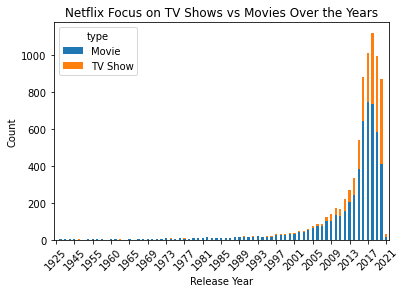

In [10]:
# Task 3: Is Netflix increasingly focusing on TV rather than movies in recent years

# Extract relevant columns for this task
focus_data = df[['type', 'release_year']]

# Count the number of TV shows and movies released each year
focus_count = focus_data.groupby(['release_year', 'type']).size().unstack().fillna(0)
# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plot the results with adjusted x-axis interval
ax = focus_count.plot(kind='bar', stacked=True)
plt.title('Netflix Focus on TV Shows vs Movies Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')

# Adjust x-axis interval further
plt.xticks(range(0, len(focus_count.index), 4), focus_count.index[::4], rotation=45)

plt.show()


In [23]:
#Director or Actor Preferences: Identify directors or actors known for producing or starring in content with specific ratings.

# Function to get unique directors for a specific rating
def get_directors_by_rating(df, rating):
    filtered_data = df[(df['rating'] == rating) & (df['director'].notna())]
    directors = filtered_data['director'].str.split(',').explode().str.strip().unique()
    return directors

# Function to get unique actors for a specific rating
def get_actors_by_rating(df, rating):
    filtered_data = df[(df['rating'] == rating) & (df['cast'].notna())]
    actors = filtered_data['cast'].str.split(',').explode().str.strip().unique()
    return actors

# Example: Get unique directors and actors for TV-MA rated content
tv_ma_directors = get_directors_by_rating(df, 'TV-MA')
tv_ma_actors = get_actors_by_rating(df, 'TV-MA')

# Display the results
print(f"Unique Directors for TV-MA: {tv_ma_directors}")
print(f"Unique Actors for TV-MA: {tv_ma_actors}")


Unique Directors for TV-MA: ['Jorge Michel Grau' 'Serdar Akar' 'Yasir Al Yasiri' ...
 'Gabriel Cruz Rivas' 'Shlok Sharma' 'Josef Fares']
Unique Actors for TV-MA: ['João Miguel' 'Bianca Comparato' 'Michel Gomes' ... 'Charbel Iskandar'
 'Yasmine Awad' 'Nasty C']


In [24]:
Directors_df = pd.DataFrame(tv_ma_directors)
Directors_df.head(10)

,0
0,Jorge Michel Grau
1,Serdar Akar
2,Yasir Al Yasiri
3,Vikram Bhatt
4,Zak Hilditch
5,Diego Enrique Osorno
6,Nottapon Boonprakob
7,Cho Il
8,Cristina Jacob
9,Frank Ariza


In [25]:
Actors_df = pd.DataFrame(tv_ma_actors)
Actors_df.head(10)

,0
0,João Miguel
1,Bianca Comparato
2,Michel Gomes
3,Rodolfo Valente
4,Vaneza Oliveira
5,Rafael Lozano
6,Viviane Porto
7,Mel Fronckowiak
8,Sergio Mamberti
9,Zezé Motta
